## Linear regression on the Boston House Prices dataset

In this exercise, you will perform linear regression on the Boston House Prices dataset.

This dataset contains median house prices in different areas around Boston. For each area, we have some information about it, that we will use as our features. We want to train a linear regression model that predicts the price of a house given the input features.

We don't have direct access to the dataset from PyTorch, but the `scikit` library provides a version of it.

An important part of the exercise will be to get used to process input dataset and translate it into a suitable format for your analysis.

In [1]:
# Import dataset
# from sklearn.datasets import load_boston
# dataset = load_boston()

Play around with the `dataset` variable to see what it contains. It is a _dictionary_, i.e. a Python structure with key-value pairs, where the keys can be arbitrary objects --- usually strings. 

To access the item with key `key` from a dictionary `dictionary`, use the syntax `dictionary[key]`.

The `keys()` method of a dictionary returns the set of keys. To start, try `print()`ing the contents of the the `DESCR` key.

The data in the dataset are Numpy arrays. To convert them to PyTorch tensors, just pass the array as the single argument of the `torch.tensor()` function.

From this point, prepare the data to process it as done in the previous exercise.

In [2]:
# Import PyTorch and dataset
import math
import torch
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
dataset = load_boston()
X = torch.tensor(dataset["data"])    # convert dataset into tensor
Y = torch.tensor(dataset["target"])  # convert labels into tensor
Y.unsqueeze_(1)                      # 506x1

# Creates theta 
theta = torch.ones(X.size()[1]+1, dtype=torch.float64)
theta.unsqueeze_(1)
print("> Theta size: " + str(theta.size()) + "\n")

# Set dataset size
N = X.size()[0]
print("> N: " + str(N) + "\n")

# Create ones column 
ones = torch.ones(X.size()[0], dtype=torch.float64)
ones.unsqueeze_(1)     # ora ones è un vettore Nx1 (prima era Nx13 perchè si prende di default la larghezza 13)
 
# Concats ones column with dataset X (column concact)
X = torch.cat([ones, X], 1)
print("> Concacts ones column \n" + "X size: " + str(X.size()) + "\n")
print("> X:\n" + str(X))

# Choose fraction of training and test samples
train_frac = 0.8               
num_train = math.floor(N*train_frac)
num_test = N - num_train

> Theta size: torch.Size([14, 1])

> N: 506

> Concacts ones column 
X size: torch.Size([506, 14])

> X:
tensor([[1.0000e+00, 6.3200e-03, 1.8000e+01,  ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [1.0000e+00, 2.7310e-02, 0.0000e+00,  ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [1.0000e+00, 2.7290e-02, 0.0000e+00,  ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [1.0000e+00, 6.0760e-02, 0.0000e+00,  ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0000e+00, 1.0959e-01, 0.0000e+00,  ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [1.0000e+00, 4.7410e-02, 0.0000e+00,  ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]], dtype=torch.float64)


> Num. training samples: 404
> Num. test samples: 102
----------------------------------
> theta:     tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       dtype=torch.float64)
> theta_est: tensor([ 3.0077e+01, -2.0214e-01,  4.4128e-02,  5.2674e-02,  1.8847e+00,
        -1.4928e+01,  4.7604e+00,  2.8873e-03, -1.3003e+00,  4.6166e-01,
        -1.5543e-02, -8.1163e-01, -1.9717e-03, -5.3227e-01],
       dtype=torch.float64)
----------------------------------
> Train MSE: 22.778379521800787
> Test MSE:  32.79986268020164
> Train MAE: 3.310518415536262
> Test MAE:  4.730017250960476


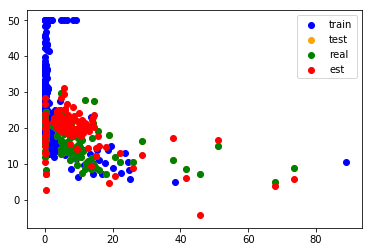

In [3]:

# Set test and train set
def train_and_test(X, Y):
    
    # Select training samples - rows from 0 to num_train-1, all columns
    X_train = X[:num_train,:]
    Y_train = Y[:num_train,:]
    # Select test samples - rows from num_train to the end, all columns
    X_test = X[num_train:,:]
    Y_test = Y[num_train:,:]

    # Estimate theta
    theta_est = (X_train.t() @ X_train).inverse() @ X_train.t() @ Y_train  #training per stimare theta

    # Print stuff
    print(f"> Num. training samples: {num_train}")
    print(f"> Num. test samples: {num_test}")
    print("----------------------------------")
    print("> theta:    ", theta.squeeze())          # This removes singleton dimensions (better visualization)
    print("> theta_est:", theta_est.squeeze())      # This removes singleton dimensions (better visualization)
    print("----------------------------------")

    # Compute MSE
    train_mse = torch.sum((Y_train - X_train @ theta_est)**2)/num_train
    test_mse = torch.sum((Y_test - X_test @ theta_est)**2)/num_test
    print(f"> Train MSE: {train_mse.item()}")
    print(f"> Test MSE:  {test_mse.item()}")

    # Compute MAE
    train_mae = torch.sum(torch.abs(Y_train - X_train @ theta_est))/num_train
    test_mae = torch.sum(torch.abs(Y_test - X_test @ theta_est))/num_test
    print(f"> Train MAE: {train_mae.item()}")
    print(f"> Test MAE:  {test_mae.item()}")

    # Plot data
    plt.scatter(X_train[:,1].numpy(), Y_train.numpy(), label="train", color="blue")
    plt.scatter(X_test[:,1].numpy(), Y_test.numpy(), label="test", color="orange")
    
    # Plot real and estimated lines for feature 1
    x_values = X_test
    real_Y = Y_test
    est_Y = x_values @ theta_est
    plt.scatter(x_values[:,1].numpy(), real_Y.numpy(), label="real", color="green")
    plt.scatter(x_values[:,1].numpy(), est_Y.numpy(), label="est", color="red")
    plt.legend()
    plt.show()

train_and_test(X, Y)

## Feature analysis

### Correlations

One of the things you may want to do is remove unnecessary features. For example, if you have two highly-correlated features, you could use only one of them.

Feature correlation can be estimated using the Pearson correlation coefficient:

$$\text{corr}_{X_1,X_2} = \frac{\text{cov}(X_1,X_2)}{\sigma_{X_1} \sigma_{X_2}}$$

where $\text{cov}(X_1,X_2)$ is the covariance between features $X_1$ and $X_2$ (i.e., all values for that feature, from all observations), and $\sigma_X$ is the standard deviation of feature $X$.

All values $X_i$ are basically the columns of our data matrix. Given the vector `X_i` that contains all values for a feature, you can use the `X_i.std()` function to get the standard deviation of that vector.

You can also use the variant of `std()` that takes an input argument to compute *all* standard deviations for each column in the full data matrix.

To compute the covariance matrix, you are going to need to perform some computations.

Let's suppose your data matrix is `X`, where each row is an observation and each column is a feature.

First of all, you will need to compute a vector `X_mean`, where each element is the mean value for each feature. To do this, you will need to use the `torch.mean()` or the `Tensor.mean()` function.

From there, you have to subtract the mean vector to each observation in the data matrix. Note that PyTorch supports an operation called *broadcasting*. In practice, if `X` has size $n \times d$, and if `X_mean` has size $d$ or $1 \times d$, then `X - X_mean` will automatically subtract `X_mean` from each row in `X`.

Finally, if $N$ is the number of observation and `X_cent` is the data matrix where the mean vector has been subtracted, you can compute the covariance matrix $\Sigma$ as:

$$\Sigma = \frac{X_{\text{cent}}^T X_{\text{cent}}}{N-1}$$

Each element $\Sigma_{ij}$ is going to be equal to $\text{cov}(X_i,X_j)$. From those values and from the $\sigma_i$ values, you can compute the correlation matrix.

In [4]:
# Calcoliamo la std di ogni feature e la matrice di covarianza
stds = []
X_mean = []
for i in range(X.size(1)):
    stds.append(torch.std(X[:,i]).item()) 
    X_mean.append(torch.mean(X[:,i]).item())
    
stds = torch.tensor(stds, dtype=torch.float64)
X_mean = torch.tensor(X_mean, dtype=torch.float64)
    
print(stds)
print(X_mean)

X_cent = X - X_mean
print(X_cent.size())

cov = (X_cent.t()@X_cent)/(N-1)
print(cov.size())

tensor([0.0000e+00, 8.6015e+00, 2.3322e+01, 6.8604e+00, 2.5399e-01, 1.1588e-01,
        7.0262e-01, 2.8149e+01, 2.1057e+00, 8.7073e+00, 1.6854e+02, 2.1649e+00,
        9.1295e+01, 7.1411e+00], dtype=torch.float64)
tensor([1.0000e+00, 3.6135e+00, 1.1364e+01, 1.1137e+01, 6.9170e-02, 5.5470e-01,
        6.2846e+00, 6.8575e+01, 3.7950e+00, 9.5494e+00, 4.0824e+02, 1.8456e+01,
        3.5667e+02, 1.2653e+01], dtype=torch.float64)
torch.Size([506, 14])
torch.Size([14, 14])


Once you have a correlation matrix `corr`, you can visualize it using the following code.

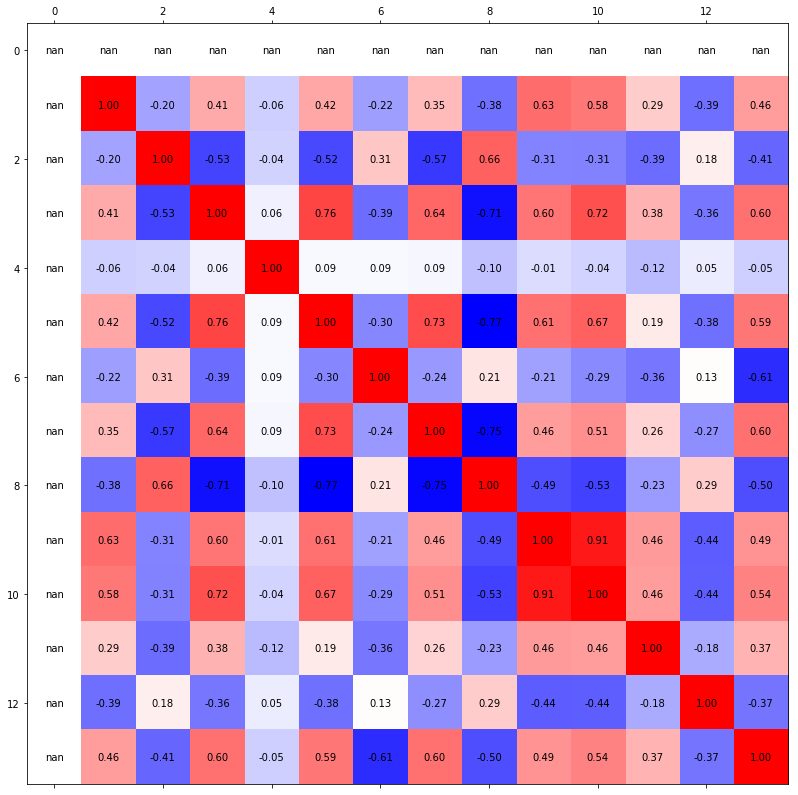

In [5]:
# Create correlation matrix
corr = cov
for i in range(corr.size(0)):
    for j in range(corr.size(1)):
        corr[i,j] = corr[i,j] / (stds[i]*stds[j])
        
# Plot matrix
# corr = corr[1:, 1:]             # decommentare la riga per effettuare la stampa senza riga e colonna di 1 
plt.figure(figsize=(14, 14))
ax = plt.gca()
ax.matshow(corr.numpy(), cmap=plt.cm.bwr)
for i in range(corr.size(0)):
    for j in range(corr.size(1)):
        c = f"{corr[i,j].item():.2f}"
        ax.text(i, j, str(c), va='center', ha='center')

An additional test you can carry out is to see which feature mostly correlate *with the targets*, to see which features are most important for regression.

**Note that you should do this on the training set only. You can't look at the test set during training.**

To do so, you can create an "extended" data matrix `data_ext` where the targets have been added as a new feature column. Then you can run the correlation analysis to see which features are mostly related.

tensor([0.0000e+00, 6.2189e+00, 2.5312e+01, 6.5363e+00, 2.8165e-01, 1.1450e-01,
        7.3192e-01, 2.9054e+01, 2.1814e+00, 6.5043e+00, 1.3155e+02, 2.2202e+00,
        4.0517e+01, 6.8234e+00, 9.2610e+00], dtype=torch.float64)
tensor([1.0000e+00, 1.9159e+00, 1.4233e+01, 9.5023e+00, 8.6634e-02, 5.3173e-01,
        6.3331e+00, 6.4427e+01, 4.1742e+00, 6.7896e+00, 3.5291e+02, 1.8026e+01,
        3.7997e+02, 1.1355e+01, 2.4176e+01], dtype=torch.float64)
torch.Size([404, 15])
torch.Size([15, 15])


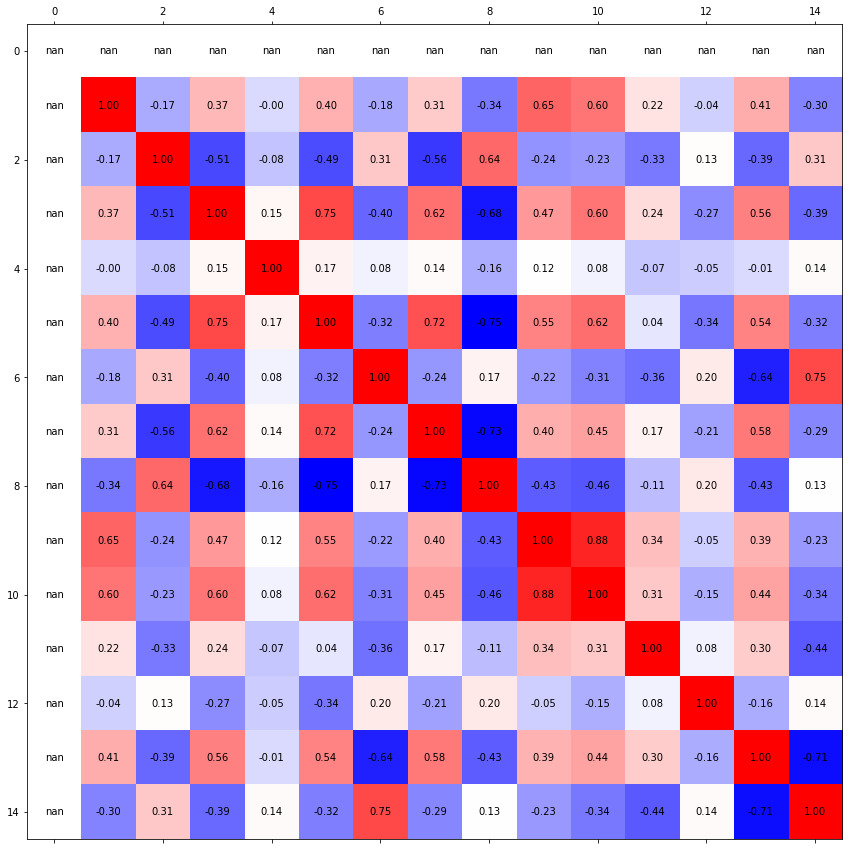

In [6]:
# Ripetiamo quanto fatto prima considerando ora X_train e Y_train e aggiungendo Y.
data_ext = torch.cat([X[:num_train,:], Y[:num_train,:]], 1)
stds = []
data_ext_mean = []
for i in range(data_ext.size(1)):
    stds.append(torch.std(data_ext[:,i]).item()) 
    data_ext_mean.append(torch.mean(data_ext[:,i]).item())
    
stds = torch.tensor(stds, dtype=torch.float64)
data_ext_mean = torch.tensor(data_ext_mean, dtype=torch.float64)
    
print(stds)
print(data_ext_mean)

data_ext_cent = data_ext - data_ext_mean
print(data_ext_cent.size())

cov = (data_ext_cent.t()@data_ext_cent)/(num_train-1)
print(cov.size())

# Create correlation matrix
corr = cov
for i in range(corr.size(0)):
    for j in range(corr.size(1)):
        corr[i,j] = corr[i,j] / (stds[i]*stds[j])
        
# Plot matrix
# corr = corr[1:, 1:]             # decommentare la riga per effettuare la stampa senza riga e colonna di 1 
plt.figure(figsize=(15, 15))
ax = plt.gca()
ax.matshow(corr.numpy(), cmap=plt.cm.bwr)
for i in range(corr.size(0)):
    for j in range(corr.size(1)):
        c = f"{corr[i,j].item():.2f}"
        ax.text(i, j, str(c), va='center', ha='center')

Finally, run some tests by:

- Computing the accuracy of your model when you remove/keep features that correlate with each other.
- Computing the accuracy of your model when you remove/keep features that correlate with the targets.

torch.Size([506, 11])
> Num. training samples: 404
> Num. test samples: 102
----------------------------------
> theta:     tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       dtype=torch.float64)
> theta_est: tensor([ 1.0944e+01, -1.0903e-01,  4.3418e-02,  2.4183e+00,  5.0794e+00,
        -1.1338e-02, -1.1274e+00, -1.9049e-03, -5.4902e-01,  7.3406e-03,
        -5.5829e-01], dtype=torch.float64)
----------------------------------
> Train MSE: 24.865036470838582
> Test MSE:  21.833292139002985
> Train MAE: 3.3806388802218033
> Test MAE:  3.625042356077395


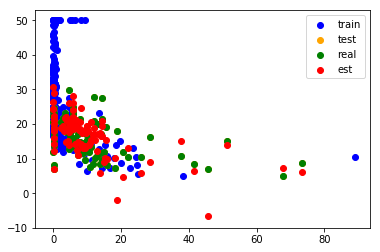

In [7]:
# Test 1: eliminando le feature con alta correlazione della prima matrice di correlazione (3, 5 e 9)
X_1 = torch.cat([X[:, 0:3], X[:, 4:5], X[:,6:9], X[:,10:]], 1)
print(X_1.size())
train_and_test(X_1, Y)

torch.Size([506, 12])
> Num. training samples: 404
> Num. test samples: 102
----------------------------------
> theta:     tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       dtype=torch.float64)
> theta_est: tensor([ 8.1407e+01, -3.3553e-01,  7.7276e-02, -2.1391e-01,  3.9940e+00,
        -3.0924e+01, -3.8918e-02, -2.2540e+00,  5.9513e-01, -1.9247e-02,
        -1.4999e+00,  5.6523e-03], dtype=torch.float64)
----------------------------------
> Train MSE: 46.296934989407646
> Test MSE:  19.747158854337986
> Train MAE: 4.93094981656623
> Test MAE:  3.4980250467159655


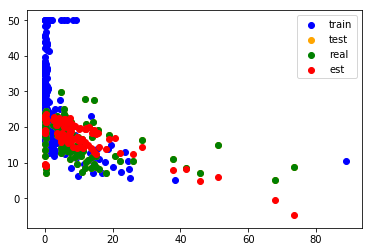

In [8]:
# Test 2: eliminando le feature con alta correlazione della seconda matrice di correlazione (6 e 13)
X_2 = torch.cat([X[:, 0:6], X[:,7:13], X[:,14:]], 1)
print(X_2.size())
train_and_test(X_2, Y)